#Code by sergio11
https://github.com/sergio11/spam_email_classifier_lstm

In [ ]:
# Mount Drive to import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Visualization
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Feature Engineering
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Machine Learning Model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Bidirectional
import tensorflow as tf

In [ ]:
# Evaluation Metric
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AI dataset/CEAS_08.csv', encoding='latin-1')
if df is not None:
    print("Dataset loaded successfully.")
else:
    print("Failed to load the dataset.")

df.head(5)

Dataset loaded successfully.


,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [ ]:
print(df.isnull().sum())

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64


In [ ]:
df.shape

(39154, 7)

In [ ]:
df['label'].value_counts()

,count
label,
1,21842
0,17312


In [ ]:
df['body'] = df['body'].str.lower()

In [ ]:
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))

df['body'] = df['body'].apply(remove_special_characters)

In [ ]:
# Define stop-words in English
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

# Tokenize the text
df['body'] = df['body'].apply(word_tokenize)

# Remove stop words
df['body'] = df['body'].apply(remove_stop_words)

# Rejoin words for EDA
df['body'] = df['body'].apply(' '.join)

In [ ]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['body'] = df['body'].apply(remove_hyperlink)

In [ ]:
for i in range (0,2):
    print("Email #"+str(i+1))
    spam_email = df[df['label'] == 1]['body'].iloc[i]
    print(spam_email+"\n")

Email #1
buck troubles caused small dimension soon become lover woman able resist  come even nazi tanks rolling streets dreamersphilosopher journalist still surei

Email #2
upgrade sex pleasures techniques 



In [ ]:
for i in range (0,2):
    print("Email #"+str(i+1))
    legitimate_email = df[df['label'] == 0]['body'].iloc[i]
    print(legitimate_email+"\n")

Email #1
would anyone object removing list tld basically dead weve found lots bogus domains like libso caught also sometimes youll spammers putting gibberish funny punctuation youll get sentences like blah blahso also occurs couple domains far worst info domain read  michael feb 7 2008 923 pm wrzzpvapacheorg wrote author sidney date thu feb 7 192258 2008 new revision 619753 url  log bug 5813 correct tld lookup match current icann list add tlds regression tests modified spamassassintrunklibmailspamassassinpermsgstatuspm spamassassintrunklibmailspamassassinutil registrarboundariespm spamassassintrunkturitextt modified spamassassintrunklibmailspamassassinpermsgstatuspm url  spamassassintrunklibmailspamassassinpermsgstatuspm original spamassassintrunklibmailspamassassinpermsgstatuspm thu feb 7 192258 2008 166517 166517 regexps finding plain text nonscheme hostnames valid tlds list validtlds utilregistrarboundariespm regexpoptimize optimized regexp accurate 20050318 regexplist optimized reg

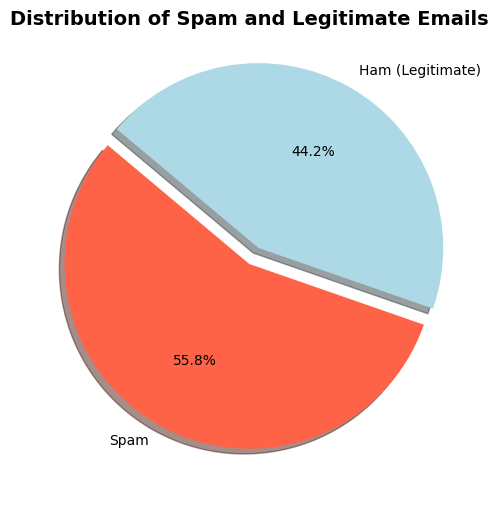

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the number of spam and legitimate emails
email_counts = df['label'].value_counts()

# Define labels and colors for the pie chart
labels = ['Spam', 'Ham (Legitimate)']
colors = ['tomato', 'lightblue']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    email_counts,
    labels=labels,
    autopct='%1.1f%%',  # Display percentage with one decimal place
    startangle=140,     # Rotate the chart for better aesthetics
    colors=colors,      # Custom colors for each category
    explode=(0, 0.1),   # Slightly "explode" the spam category for emphasis
    shadow=True         # Add shadow for a 3D effect
)

# Add a title with better formatting
plt.title('Distribution of Spam and Legitimate Emails', fontsize=14, fontweight='bold')

# Display the chart
plt.show()

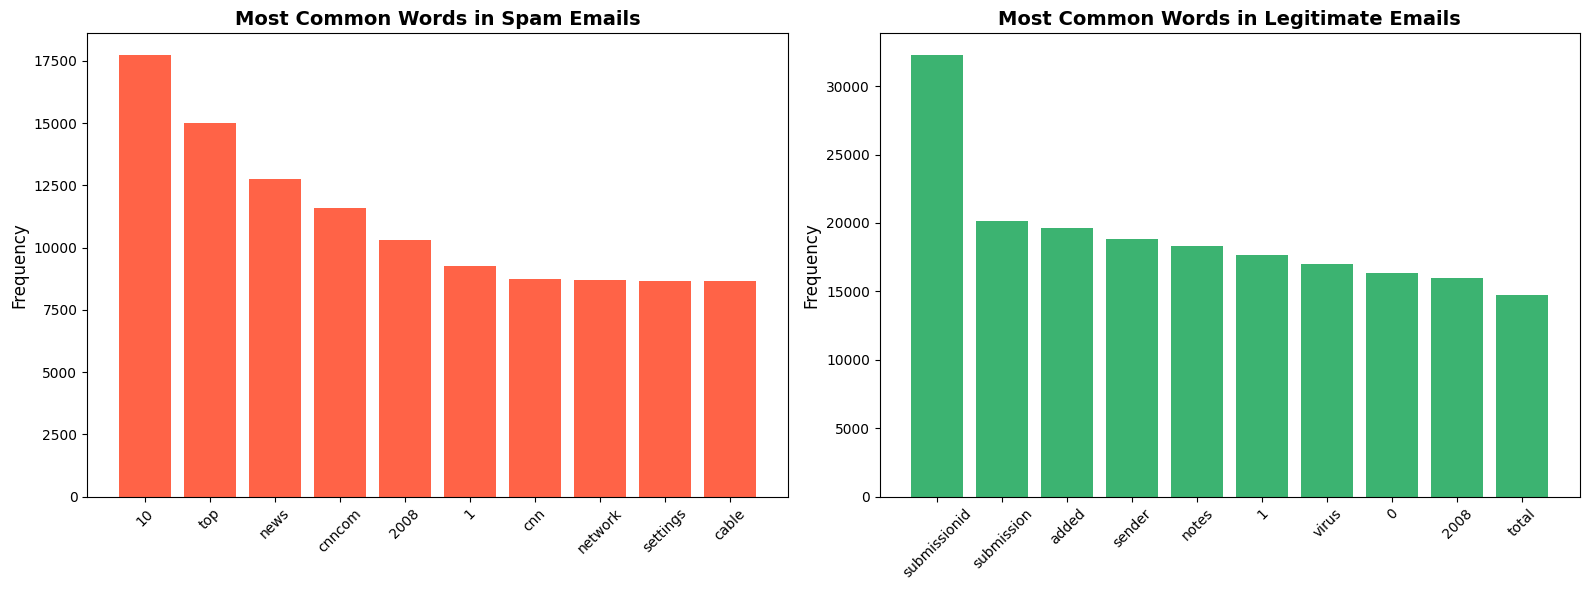

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Separate the spam and legitimate emails
spam_emails = df.loc[df['label'] == 1, 'body']
legit_emails = df.loc[df['label'] == 0, 'body']

# Define a function to count word frequencies
def count_word_frequencies(email_series):
    word_counter = Counter()
    email_series.str.split().apply(word_counter.update)
    return word_counter

# Count word frequencies for spam and legitimate emails
spam_words = count_word_frequencies(spam_emails)
legit_words = count_word_frequencies(legit_emails)

# Get the 10 most common words for each category
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrames for visualization
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

# Set up the figure for plotting
plt.figure(figsize=(16, 6))

# Plot the most common words in spam emails
plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='tomato')
plt.title('Most Common Words in Spam Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Plot the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='mediumseagreen')
plt.title('Most Common Words in Legitimate Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better visual appeal
plt.tight_layout()

# Display the plots
plt.show()

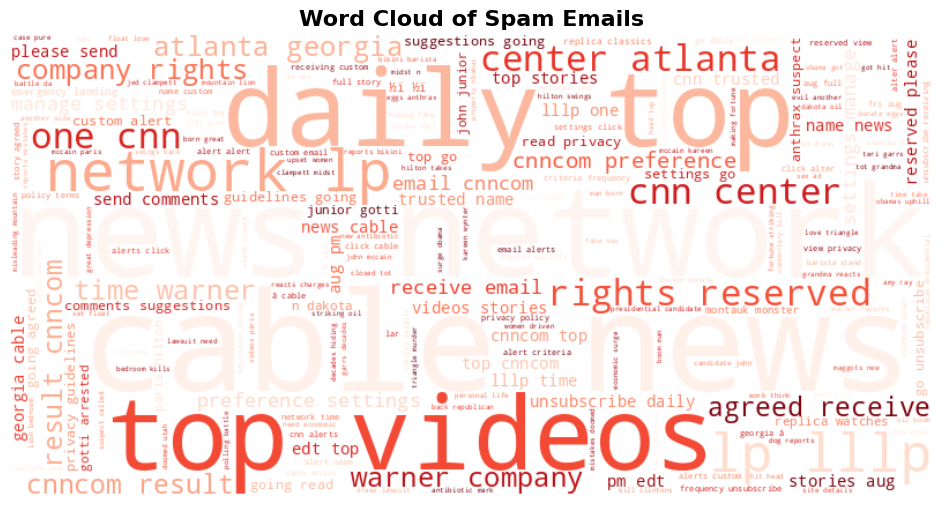

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(
    width=800,  # Width of the image
    height=400,  # Height of the image
    background_color='white',  # Background color for better visibility
    colormap='Reds',  # Color theme to match the spam context
    max_words=200,  # Limit the number of words to show in the cloud
    contour_color='black',  # Optional: Outline color for the word cloud
    contour_width=1  # Optional: Outline width for a polished look
).generate(' '.join(spam_emails))  # Join all spam emails into a single string

# Display the word cloud image
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
plt.imshow(spam_wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smooth display
plt.axis('off')  # Turn off axes for a clean look
plt.title('Word Cloud of Spam Emails', fontsize=16, fontweight='bold')  # Add a descriptive title
plt.show()

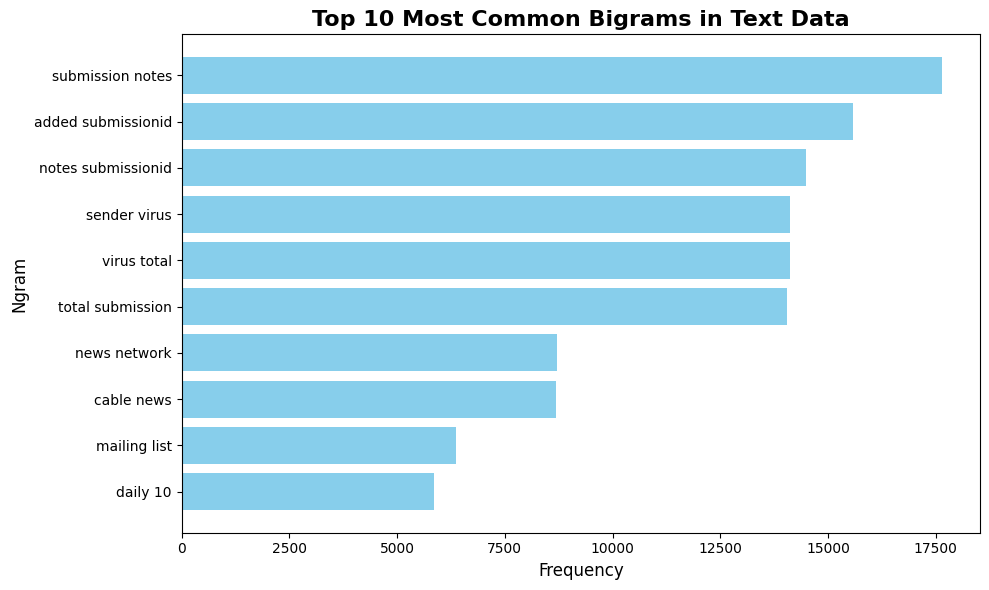

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), top_n=10, title='Top Ngrams', color='skyblue'):
    """
    Generate and visualize the top n-grams in a given text corpus.

    Args:
        corpus (list): List of text data to analyze.
        ngram_range (tuple): The range of n-grams to consider, e.g., (2, 2) for bigrams.
        top_n (int): The number of top n-grams to display.
        title (str): The title of the plot.
        color (str): The color of the bars in the plot.
    """
    # Create a CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_matrix = vectorizer.fit_transform(corpus)

    # Sum the occurrences of each n-gram
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()

    # Create a DataFrame of n-grams and their frequencies
    ngrams_df = pd.DataFrame({'Ngram': ngram_features, 'Frequency': ngram_counts})
    ngrams_df = ngrams_df.sort_values(by='Frequency', ascending=False).head(top_n)

    # Plot the top n-grams
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams_df['Ngram'], ngrams_df['Frequency'], color=color)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Ngram', fontsize=12)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Display the highest frequency at the top
    plt.tight_layout()
    plt.show()

# Example usage: Analyzing bigrams in the dataset
plot_top_ngrams(
    df['body'],
    ngram_range=(2, 2),
    top_n=10,
    title='Top 10 Most Common Bigrams in Text Data',
    color='skyblue'
)

In [ ]:
# Split the data into features and target
X = df['body']
y = df['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
max_features = 5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

df.head(5)

,sender,receiver,date,subject,text,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,buck troubles caused small dimension soon beco...,1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,upgrade sex pleasures techniques,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,daily top 10 cnncom top videos stories aug 1 2...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,would anyone object removing list tld basicall...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,welcomefastshippingcustomersupport,1,1


In [ ]:
# Average Length
average_length = df['body'].apply(len).mean()
print("Average Length: "+str(average_length))

max_length = 500

# Padding sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

Average Length: 893.7870204832201


In [ ]:
# Import the LabelEncoder class from scikit-learn to encode categorical labels into numerical values.
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the training data (y_train) and transform the labels into numerical values.
# The labels in y_train (e.g., 'spam' and 'ham') will be converted to integers (e.g., 1 and 0).
y_train_encoded = label_encoder.fit_transform(y_train)

# Use the fitted LabelEncoder to transform the test data labels (y_test).
# It ensures that the same encoding scheme applied to y_train is applied to y_test, ensuring consistency.
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
import pickle

# Save the trained LabelEncoder to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [ ]:
# Define the length of the embedding vectors (32-dimensional)
embedding_vector_length = 32

# Initialize a Sequential model in Keras
model = tf.keras.Sequential()

# Add an embedding layer:
# This converts input sequences of integers into dense vectors of fixed size (32).
# `max_features` is the maximum number of words to consider in the vocabulary.
# `embedding_vector_length` defines the size of the vector for each word.
# `input_length` is the length of input sequences.
model.add(Embedding(input_dim=max_features,  # Total number of words in the dataset
                    output_dim=embedding_vector_length,  # Length of the embedding vector
                    input_length=max_length))  # Length of each input sequence

# Add a Bidirectional LSTM layer:
# LSTM (Long Short-Term Memory) is used to process sequences of data, and the 'Bidirectional' wrapper
# allows the network to process the sequence in both forward and backward directions.
# `64` defines the number of LSTM units.
model.add(Bidirectional(tf.keras.layers.LSTM(64)))

# Add a Dense fully-connected layer with 16 neurons and ReLU activation:
# This layer introduces non-linearity and allows the model to capture more complex patterns.
model.add(Dense(16, activation='relu'))

# Add a Dropout layer to prevent overfitting:
# Dropout randomly sets a fraction of input units to 0 at each update during training to prevent overfitting.
# The dropout rate is set to 10% (0.1).
model.add(Dropout(0.1))

# Add the output layer with 1 neuron:
# The final layer uses the sigmoid activation function to output a value between 0 and 1, suitable for binary classification.
model.add(Dense(1, activation='sigmoid'))

# Compile the model:
# We use binary crossentropy as the loss function for binary classification problems.
# The optimizer is set to Adam, which is an efficient optimization algorithm.
# 'accuracy' is used as the metric to evaluate the performance during training and evaluation.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model architecture summary to show all layers and their parameters
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_padded, y_train_encoded,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test_padded, y_test_encoded),
                    callbacks=[early_stopping])

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.7197 - loss: 0.4996 - val_accuracy: 0.9849 - val_loss: 0.0509
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9882 - loss: 0.0505 - val_accuracy: 0.9911 - val_loss: 0.0327
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9930 - loss: 0.0292 - val_accuracy: 0.9924 - val_loss: 0.0263
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9944 - loss: 0.0243 - val_accuracy: 0.9930 - val_loss: 0.0249
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9968 - loss: 0.0158 - val_accuracy: 0.9928 - val_loss: 0.0261
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9975 - loss: 0.0128 - val_accuracy: 0.9934 - val_loss: 0.0232
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9983 - loss: 0.0093 - val_accuracy: 0.9929 - val_loss: 0.0238
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9981 - loss: 0.0089 - val_accuracy: 0.9928 - v

In [ ]:
# # Define the file paths for saving the model and weights
# model_path = 'trained_model/model.h5'
# weights_path = 'trained_model/.weights.h5'

# # Save the trained model architecture
# model.save(model_path)

# # Save the trained model weights
# model.save_weights(weights_path)

In [ ]:
y_pred = model.predict(X_test_padded)
y_predict = [1 if o > 0.5 else 0 for o in y_pred]

368/368 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step


In [ ]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_encoded, y_predict)

# Extract True Negatives, False Positives, False Negatives, True Positives
tn, fp, fn, tp = cf_matrix.ravel()

# Calculate performance metrics
precision = precision_score(y_test_encoded, y_predict)
recall = recall_score(y_test_encoded, y_predict)
f1 = f1_score(y_test_encoded, y_predict)
accuracy = accuracy_score(y_test_encoded, y_predict)

# Print metrics
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")

Precision: 99.57%
Recall: 99.23%
F1 Score: 99.40%
Accuracy: 99.34%


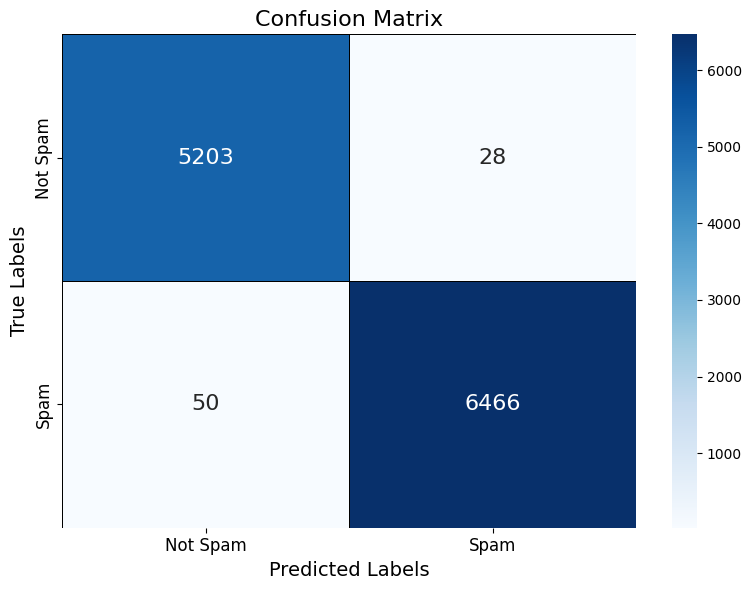

In [ ]:
# Create the confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 6))  # Added figsize for better visibility

# Plot the heatmap with proper annotations
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax, cbar=True,
            annot_kws={"size": 16}, linewidths=0.5, linecolor='black')

# Set labels, title, and tick labels
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)

# Set the x and y axis ticks to reflect spam classification labels
ax.xaxis.set_ticklabels(['Not Spam', 'Spam'], fontsize=12)
ax.yaxis.set_ticklabels(['Not Spam', 'Spam'], fontsize=12)

# Adjust layout to avoid label clipping
plt.tight_layout()

# Display the plot
plt.show()